In [48]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda
from src import soporte_correlacion as sp_corr

In [49]:
df = pd.read_csv("files/intermedios/wines_clean.csv", index_col=0)

In [50]:
df.head(5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0


In [51]:
duplicados = df[df.duplicated].sort_values('vino')
duplicados.head(100)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


--------------------------------------------------------------------------

📊 Exploración categórica de 'tipo':
 - Moda: Ribera del Duero Tinto
 - Cardinalidad (nº de categorías distintas): 22
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


tipo
Ribera del Duero Tinto    535
Rioja Tinto               451
Priorat Tinto             238
Tinto                     210
NaN                       106
Toro Tinto                 78
Tempranillo                73
Jerez                      56
Rioja Blanco               37
Pedro Ximenez              35
Garnacha                   35
Albarino                   34
Cava                       33
Verdejo                    27
Monastrell                 18
Montsant Tinto             17
Mencia                     17
Syrah                      15
Chardonnay                 13
Cabernet Sauvignon         11
Espumoso                    5
Sauvignon Blanc             4
Name: count, dtype: int64


Frecuencias relativas (%):


tipo
Ribera del Duero Tinto    26.12
Rioja Tinto               22.02
Priorat Tinto             11.62
Tinto                     10.25
NaN                        5.18
Toro Tinto                 3.81
Tempranillo                3.56
Jerez                      2.73
Rioja Blanco               1.81
Pedro Ximenez              1.71
Garnacha                   1.71
Albarino                   1.66
Cava                       1.61
Verdejo                    1.32
Monastrell                 0.88
Montsant Tinto             0.83
Mencia                     0.83
Syrah                      0.73
Chardonnay                 0.63
Cabernet Sauvignon         0.54
Espumoso                   0.24
Sauvignon Blanc            0.20
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


tipo
Ribera del Duero Tinto    535
Rioja Tinto               451
Priorat Tinto             238
Tinto                     210
NaN                       106
Toro Tinto                 78
Tempranillo                73
Jerez                      56
Rioja Blanco               37
Pedro Ximenez              35
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 8


tipo
Monastrell            0.88
Montsant Tinto        0.83
Mencia                0.83
Syrah                 0.73
Chardonnay            0.63
Cabernet Sauvignon    0.54
Espumoso              0.24
Sauvignon Blanc       0.20
Name: proportion, dtype: float64

--------------------------------------------------------------------------


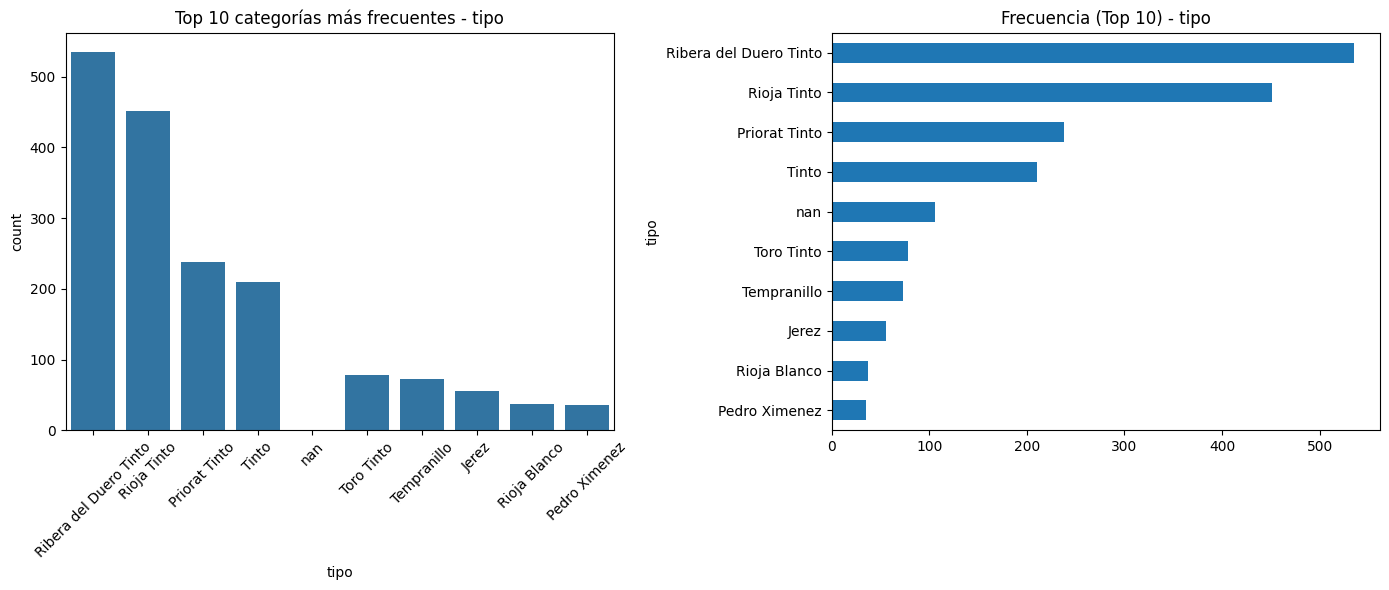

{'moda': 'Ribera del Duero Tinto',
 'cardinalidad': 22,
 'frecuencias_abs': tipo
 Ribera del Duero Tinto    535
 Rioja Tinto               451
 Priorat Tinto             238
 Tinto                     210
 NaN                       106
 Toro Tinto                 78
 Tempranillo                73
 Jerez                      56
 Rioja Blanco               37
 Pedro Ximenez              35
 Garnacha                   35
 Albarino                   34
 Cava                       33
 Verdejo                    27
 Monastrell                 18
 Montsant Tinto             17
 Mencia                     17
 Syrah                      15
 Chardonnay                 13
 Cabernet Sauvignon         11
 Espumoso                    5
 Sauvignon Blanc             4
 Name: count, dtype: int64,
 'frecuencias_rel': tipo
 Ribera del Duero Tinto    26.12
 Rioja Tinto               22.02
 Priorat Tinto             11.62
 Tinto                     10.25
 NaN                        5.18
 Toro Tinto        

In [52]:
sp_eda.exploracion_cat(df,'tipo', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)

In [53]:
df_nan = df[df["tipo"].isna()]

In [54]:
df_nan

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1934,Gramona,Gessami,2020,4.2,692,Espana,Penedes,11.20000,NaN,NaN,NaN
1982,Emilio Moro,La Revelia Godello,2018,4.2,484,Espana,Bierzo,21.95000,NaN,NaN,NaN
1995,Culebron,Fondillon Gran Reserva,1964,4.2,432,Espana,Alicante,49.95000,NaN,NaN,NaN
2011,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [55]:
df = df.copy()
df["id_fila"] = range(len(df))

In [56]:
df.head (5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,id_fila
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,1
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,2
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,3
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,4


In [57]:
cols_objetivo = ["acidez", "tipo", "cuerpo"]

df_nan = df[
    df[cols_objetivo].isna().any(axis=1)
].copy()

In [58]:
df_nan.to_excel(
    "filas_con_nan_acidez_tipo_cuerpo.xlsx",
    index=False
)

In [59]:
df_nan_editado = pd.read_excel("files/intermedios/nuloscorregido.xlsx")

In [60]:
df.columns = df.columns.str.strip()
df_nan_editado.columns = df_nan_editado.columns.str.strip()

In [61]:
cols_objetivo = ["acidez", "tipo", "cuerpo"]

df = df.merge(
    df_nan_editado,
    on="id_fila",
    how="left",
    suffixes=("", "_nuevo")
)

for col in cols_objetivo:
    df[col] = df[col].fillna(df[f"{col}_nuevo"])

df.drop(columns=[f"{c}_nuevo" for c in cols_objetivo], inplace=True)

In [62]:
df[cols_objetivo].isna().sum()

acidez    0
tipo      0
cuerpo    0
dtype: int64

In [63]:
df.drop(columns="id_fila", inplace=True)

In [64]:
df.head(5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,bodega_nuevo,vino_nuevo,anio_nuevo,calificacion_nuevo,num_resenas_nuevo,pais_nuevo,region_nuevo,precio_nuevo
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cols_a_borrar = [
    "bodega_nuevo",
    "vino_nuevo",
    "anio_nuevo",
    "calificacion_nuevo",
    "num_resenas_nuevo",
    "pais_nuevo",
    "region_nuevo",
    "precio_nuevo",
]

df.drop(columns=cols_a_borrar, inplace=True)

In [66]:
df.head (15)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0


In [67]:
df["tipo"].unique()

array(['Toro Tinto', 'Tempranillo', 'Ribera del Duero Tinto',
       'Pedro Ximenez', 'Tinto', 'Jerez', 'Priorat Tinto', 'Rioja Tinto',
       'Rioja Blanco', 'Garnacha', 'Tintilla de Rota', 'Cava',
       'D.O. Valdeorras ', 'D.O. Alicante', 'Verdejo', 'D.O. Priorato',
       'Syrah', 'D.O. Ribeiro.', 'Monastrell', 'Mencia', 'NO TIENE',
       'V.T. Cádiz', 'D.O. Málaga ', 'Espumoso', 'Montsant Tinto',
       'Albarino', 'D.O. Ribeiro', 'D.O. Valdeorras', 'Chardonnay',
       'Rias Baixas', 'D.O. Penedès', 'Cabernet Sauvignon',
       'Sauvignon Blanc', 'V.T. Castilla y León', 'D.O. Rioja',
       'D.O. Ribeira Sacra', 'V.T. Castilla y León ', 'D.O. Alella',
       'D.O. Málaga.', 'DO Pla i Llevant', 'V.T. Mallorca',
       'DO Costers del Segre', 'D.O. Catalunya', 'D.O. La Palma',
       'D.O. Montilla-Moriles', 'D.O. Navarra', 'D.O Priorato',
       'Ribera del Duero Blanco', 'D.O Ribeiro', 'D.O. Bierzo',
       'Ribera del Duero Rosado', 'DO Penedés ', 'V.T. Mallorca '],
      dtyp

In [68]:
df.shape

(2048, 11)

In [69]:
df[df["tipo"] == "NO TIENE"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
312,Pago de Larrainzar,Rosado de Larrainzar,2020,4.6,39,Espana,Navarra,12.00,NO TIENE,0.0,0.0
1265,St. Petroni,Vermello Vermu,N.V.,4.3,424,Espana,Galicia,10.89,NO TIENE,0.0,0.0
1343,Jorge Ordonez,No. 2 Victoria,2017,4.3,232,Espana,Malaga,21.40,NO TIENE,0.0,0.0
1387,Bodegas Mauro,Godello Blanco,2017,4.3,186,Espana,Bierzo,34.50,NO TIENE,0.0,0.0
1408,Vinos Guerra,Reserva Vermouth Rojo,N.V.,4.3,166,Espana,Bierzo,8.95,NO TIENE,0.0,0.0
1425,St. Petroni,Branco Vermu,N.V.,4.3,148,Espana,Galicia,13.95,NO TIENE,0.0,0.0
1457,De Muller,Vermouth Reserva,N.V.,4.3,129,Espana,Tarragona,10.45,NO TIENE,0.0,0.0
1604,Enric Soler,Nun Vinya dels Taus,2017,4.3,62,Espana,Penedes,123.75,NO TIENE,0.0,0.0
1614,Bodegas Yzaguirre,Selection 1884 Vermouth Gran Reserva,N.V.,4.3,57,Espana,Cataluna,27.11,NO TIENE,0.0,0.0
1620,Finca Torremilanos,Penalba Lopez Blanco,2019,4.3,57,Espana,Castilla y Leon,13.65,NO TIENE,0.0,0.0


HAY QUE ELIMINAR LOS QUE EN TIPO DICEN NO TIENE (hecho al final)

EVALUAR LOS D.O Rioja SI PODEMOS PONERLES TINTO O BLANCO. --> es un rosado podemos ver si lo dejamos o lo eliminamos

In [70]:
df[df["tipo"] == "D.O. Rioja"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
796,R. Lopez de Heredia,Gran Reserva Rosado,2011,4.4,206,Espana,Rioja Alta,49.95,D.O. Rioja,3.0,3.0


In [71]:
df.loc[df["tipo"] == "D.O. Rioja", "tipo"] = "Rioja Rosado"

In [72]:
df[df["tipo"] == "Rioja Rosado"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
796,R. Lopez de Heredia,Gran Reserva Rosado,2011,4.4,206,Espana,Rioja Alta,49.95,Rioja Rosado,3.0,3.0


In [73]:
df["region"].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

CORREGIMOS REGION VINO DE ESPANA

In [74]:
if "id_fila" not in df.columns:
    df["id_fila"] = range(len(df))
    

In [75]:
df_region = df[
    df["region"]
    .astype(str)
    .str.strip()
    .str.lower()
    == "vino de espana"
].copy()

In [76]:
df_region.to_excel(
    "region_vino_de_espana.xlsx",
    index=False
)

In [77]:
df_region_editado = pd.read_excel("files/intermedios/region_vino_de_espana_corregido.xlsx")

In [78]:
df = df.merge(
    df_region_editado,
    on="id_fila",
    how="left",
    suffixes=("", "_nuevo")
)

In [79]:
cols_actualizar = [c for c in df_region_editado.columns if c != "id_fila"]

for col in cols_actualizar:
    mask = df[f"{col}_nuevo"].notna()
    df.loc[mask, col] = df.loc[mask, f"{col}_nuevo"]

In [80]:
df.drop(columns=[f"{c}_nuevo" for c in cols_actualizar], inplace=True)

In [81]:
df.loc[df["id_fila"].isin(df_region_editado["id_fila"]), ["region"]]

,region
1,Rioja Alavesa
146,Rioja Alavesa
190,Rioja Alavesa
206,Rioja Alavesa
208,Rioja Alavesa
211,Rioja Alavesa
221,Rioja Alavesa
231,Rioja Alavesa
236,Rioja Alavesa
241,Rioja Alavesa


In [82]:
df.head(10)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,id_fila
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Rioja Alavesa,313.50,Tempranillo,4.0,2.0,1
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,2
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,3
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,4
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0,5
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0,6
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0,7
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0,8
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0,9


In [83]:
df.drop(columns="id_fila", inplace=True)

In [84]:
df.head(10)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Rioja Alavesa,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0


In [85]:
df["region"].unique()

array(['Toro', 'Rioja Alavesa', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'NO TIENE', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Gallego-Cin

Eliminamos los 29 vinos que no tienen tipo:

In [86]:
df.drop(df[df["tipo"] == "NO TIENE"].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Eliminamos las regiones = NO TIENE, que nos han sido imposibles de completar, ya que pertenecen a distintas regiones o bien no se especifican.

In [87]:
df[df["region"] == "NO TIENE"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
322,Micro Bio (MicroBio),Respublica Verdejo,2016,4.6,33,Espana,NO TIENE,75.95,Verdejo,3.0,3.0
739,Artadi,Pagos Viejos,2006,4.4,442,Espana,NO TIENE,90.50,Tempranillo,3.0,3.0
773,Artadi,Pagos Viejos,2004,4.4,262,Espana,NO TIENE,57.11,Tempranillo,4.0,2.0
850,La Unica,Fourth Edition,20172018,4.4,131,Espana,NO TIENE,40.00,Tempranillo,4.0,2.0
1373,Artadi,Pagos Viejos,2013,4.3,193,Espana,NO TIENE,62.50,Tempranillo,4.0,2.0
1381,Artadi,Pagos Viejos,2001,4.3,189,Espana,NO TIENE,130.00,Tempranillo,4.0,2.0
1709,Artadi,La Morera de San Lazaro,2016,4.3,36,Espana,NO TIENE,80.00,Tempranillo,4.0,2.0
1795,Felix Solis,Mucho Mas Tinto,N.V.,4.2,32624,Espana,NO TIENE,4.99,Tinto,4.0,3.0


In [88]:
df.drop(df[df["region"] == "NO TIENE"].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [89]:
df[df["region"] == "NO TIENE"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


In [90]:
df[df["region"] == "Castilla y Leon"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
89,Bodegas Mauro,Terreus Paraje de Cueva Baja,2017,4.7,251,Espana,Castilla y Leon,66.070000,Tempranillo,4.0,2.0
149,Bodegas Mauro,Terreus Paraje de Cueva Baja,2019,4.7,33,Espana,Castilla y Leon,86.900000,Tempranillo,4.0,2.0
186,Bodegas Mauro,Terreus Paraje de Cueva Baja,2015,4.6,313,Espana,Castilla y Leon,94.950000,Tempranillo,4.0,2.0
187,Bodegas Mauro,Terreus Paraje de Cueva Baja,2016,4.6,304,Espana,Castilla y Leon,89.000000,Tempranillo,4.0,2.0
223,Bodegas Mauro,VS,2018,4.6,136,Espana,Castilla y Leon,58.900000,Tempranillo,4.0,2.0
228,Bodegas Mauro,Terreus Paraje de Cueva Baja,2018,4.6,128,Espana,Castilla y Leon,88.050000,Tempranillo,4.0,2.0
245,Ossian,Capitel,2018,4.6,107,Espana,Castilla y Leon,50.510000,Verdejo,3.0,3.0
418,Bodegas Mauro,VS,2017,4.5,318,Espana,Castilla y Leon,56.500000,Tempranillo,4.0,2.0
454,Abadia Retuerta,Pago Garduna,2016,4.5,186,Espana,Castilla y Leon,71.850000,Syrah,4.0,3.0
463,Ossian,Capitel,2016,4.5,162,Espana,Castilla y Leon,144.780000,Verdejo,3.0,3.0


In [91]:
df[df["region"] == "Castilla"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
892,Pago de Vallegarcia,Montes de Toledo Syrah,2019,4.4,97,Espana,Castilla,19.500000,Syrah,4.0,3.0
920,Pago de Vallegarcia,Hipperia Red Blend,2018,4.4,79,Espana,Castilla,24.900000,Tinto,4.0,3.0
1287,Pago de Vallegarcia,Montes de Toledo Syrah,2018,4.3,344,Espana,Castilla,25.310000,Syrah,4.0,3.0
1379,Pago de Vallegarcia,Hipperia Red Blend,2016,4.3,184,Espana,Castilla,36.111307,Tinto,4.0,3.0
1420,Mas Que Vinos,La Plazuela,2015,4.3,141,Espana,Castilla,44.050000,Tinto,4.0,3.0
1465,Pago de Vallegarcia,Vallegarcia Viognier,2019,4.3,114,Espana,Castilla,18.500000,V.T. Castilla y León,3.0,4.5
1628,Finca Rio Negro,Cerro del Lobo Syrah,2018,4.3,51,Espana,Castilla,24.500000,Syrah,4.0,3.0


In [92]:
df.loc[df["region"] == "Castilla", "region"] = "Castilla y Leon"

In [93]:
df[df["region"] == "Castilla"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


In [94]:
df[df["region"] == "Cataluna"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
345,Recaredo,Corpinnat Enoteca Reserva Particular de Recaredo,2004,4.6,25,Espana,Cataluna,130.00,Espumoso,2.0,3.0
585,Clos d'Agon,Seleccion Especial,2015,4.5,40,Espana,Cataluna,93.51,Tinto,4.0,3.0
1111,Familia Torres,San Valentin Parellada,2019,4.3,7401,Espana,Cataluna,6.95,D.O. Catalunya,2.0,3.0
1373,Clos d'Agon,Tinto,2014,4.3,190,Espana,Cataluna,36.50,Tinto,4.0,3.0
1380,Clos d'Agon,Tinto,2015,4.3,184,Espana,Cataluna,56.92,Tinto,4.0,3.0
1517,Can Rafols dels Caus,El Rocallis,2015,4.3,83,Espana,Cataluna,88.00,D.O. Catalunya,3.0,3.0
1530,Can Rafols dels Caus,El Rocallis,2016,4.3,80,Espana,Cataluna,34.50,D.O. Catalunya,3.0,3.0
1786,Nin-Ortiz,Selma de Nin Blanco,2017,4.3,25,Espana,Cataluna,56.95,D.O. Catalunya,3.0,3.0


In [95]:
df["region"].unique()

array(['Toro', 'Rioja Alavesa', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Costers del Segre', 'Sardon de Duero', 'Malaga', 'Cataluna',
       'Rueda', 'Jerez Pedro Ximenes (PX)', 'Montsant',
       'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado', 'Navarra',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Alella', 'Pla i Llevant',
       'Pla de Bages', 'Pago Calzadilla', 'Andalucia', 'Monterrei',
       'Ribera del Gallego-Cinco Villas', 'Aragon', 'L

In [96]:
sp_eda.exploracion_basica(df)

### Información general del DataFrame ###
Forma (filas, columnas): (2011, 11)
Columnas: ['bodega', 'vino', 'anio', 'calificacion', 'num_resenas', 'pais', 'region', 'precio', 'tipo', 'cuerpo', 'acidez']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bodega        2011 non-null   object 
 1   vino          2011 non-null   object 
 2   anio          2011 non-null   object 
 3   calificacion  2011 non-null   float64
 4   num_resenas   2011 non-null   int64  
 5   pais          2011 non-null   object 
 6   region        2011 non-null   object 
 7   precio        2011 non-null   float64
 8   tipo          2011 non-null   object 
 9   cuerpo        2011 non-null   float64
 10  acidez        2011 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 172.9+ KB
---------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
calificacion,2011.0,4.402735,0.147475,4.20,4.300000,4.40,4.50,4.90
num_resenas,2011.0,565.476380,1188.930004,25.00,59.000000,142.00,495.00,16505.00
precio,2011.0,137.028610,274.312800,6.26,32.005539,53.95,111.95,3119.08
cuerpo,2011.0,4.096221,0.808269,0.00,4.000000,4.00,5.00,5.00
acidez,2011.0,2.926156,0.428630,0.00,3.000000,3.00,3.00,5.00



### Estadísticas descriptivas para variables categóricas ###


,count,unique,top,freq
bodega,2011,468,Vega Sicilia,97
vino,2011,821,Tinto,56
anio,2011,72,2016,240
pais,2011,1,Espana,2011
region,2011,72,Ribera del Duero,542
tipo,2011,52,Ribera del Duero Tinto,535


In [97]:
duplicados = df[df.duplicated(subset=["bodega", "vino", "anio"], keep=False)]
duplicados

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
1961,Remirez de Ganuza,Rioja Blanco,2017,4.2,421,Espana,Rioja,29.15,Rioja Blanco,3.0,3.0
1962,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.50,Rioja Tinto,3.0,3.0
1963,Enrique Mendoza,Santa Rosa,2017,4.2,420,Espana,Alicante,18.90,Tinto,3.0,3.0
1964,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Tinto,3.0,3.0
1965,Sierra Cantabria,Coleccion Privada,2012,4.2,420,Espana,Rioja,28.30,Rioja Tinto,3.0,3.0
1966,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Tinto,3.0,3.0
1967,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.90,Mencia,3.0,3.0
1968,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Espana,Rias Baixas,16.78,Albarino,3.0,5.0
1969,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Tinto,3.0,3.0
1970,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera del Duero Tinto,3.0,3.0


In [98]:
duplicados.sort_values(by=["bodega", "vino", "anio"])

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
1979,Artadi,Valdegines,2016,4.2,398,Espana,Rioja Alavesa,48.96,Tempranillo,0.0,0.0
2002,Artadi,Valdegines,2016,4.2,398,Espana,Rioja Alavesa,48.96,Tempranillo,4.0,2.0
1970,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera del Duero Tinto,3.0,3.0
1995,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera del Duero Tinto,5.0,3.0
1972,Campillo,Gran Reserva Rioja,2012,4.2,410,Espana,Rioja,22.99,Rioja Tinto,3.0,3.0
1997,Campillo,Gran Reserva Rioja,2012,4.2,410,Espana,Rioja,22.99,Rioja Tinto,4.0,3.0
1964,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Tinto,3.0,3.0
1989,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Tinto,4.0,3.0
1982,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Tinto,3.0,3.0
2005,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Tinto,4.0,3.0


In [99]:
df = df.drop_duplicates(subset=["bodega", "vino", "anio"], keep="last")

In [100]:
df[df.duplicated(["bodega", "vino", "anio"])]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


In [101]:
sp_eda.exploracion_basica(df)

### Información general del DataFrame ###
Forma (filas, columnas): (1987, 11)
Columnas: ['bodega', 'vino', 'anio', 'calificacion', 'num_resenas', 'pais', 'region', 'precio', 'tipo', 'cuerpo', 'acidez']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bodega        1987 non-null   object 
 1   vino          1987 non-null   object 
 2   anio          1987 non-null   object 
 3   calificacion  1987 non-null   float64
 4   num_resenas   1987 non-null   int64  
 5   pais          1987 non-null   object 
 6   region        1987 non-null   object 
 7   precio        1987 non-null   float64
 8   tipo          1987 non-null   object 
 9   cuerpo        1987 non-null   float64
 10  acidez        1987 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 186.3+ KB
--------------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
calificacion,1987.0,4.405184,0.146659,4.20,4.300,4.4,4.5,4.90
num_resenas,1987.0,567.411676,1195.960320,25.00,58.000,140.0,500.5,16505.00
precio,1987.0,138.278376,275.719829,6.26,32.475,54.5,113.2,3119.08
cuerpo,1987.0,4.113991,0.789193,0.00,4.000,4.0,5.0,5.00
acidez,1987.0,2.928787,0.413258,0.00,3.000,3.0,3.0,5.00



### Estadísticas descriptivas para variables categóricas ###


,count,unique,top,freq
bodega,1987,468,Vega Sicilia,97
vino,1987,821,Tinto,56
anio,1987,72,2016,237
pais,1987,1,Espana,1987
region,1987,72,Ribera del Duero,538
tipo,1987,52,Ribera del Duero Tinto,531


La columna 'acidez' es de tipo float64.
El número total de valores únicos es de 7.
Los valores únicos son: [3.  2.  1.  4.  0.  4.5 5. ]
--------------------------------------------------------------------------

📊 Exploración numérica de 'acidez':
 - min: 0.0
 - max: 5.0
 - mean: 2.93
 - median: 3.0
 - std: 0.41
 - percentil_25: 3.0
 - percentil_75: 3.0
--------------------------------------------------------------------------

Tabla completa describe():
count    1987.000000
mean        2.928787
std         0.413258
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: acidez, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 141
Conteo de outliers por valor único:
acidez
2.0    66
1.0    35
4.0    25
0.0    12
5.0     2
4.5     1
Name: count, dtype: int64
--------------------------------------------------------------------------


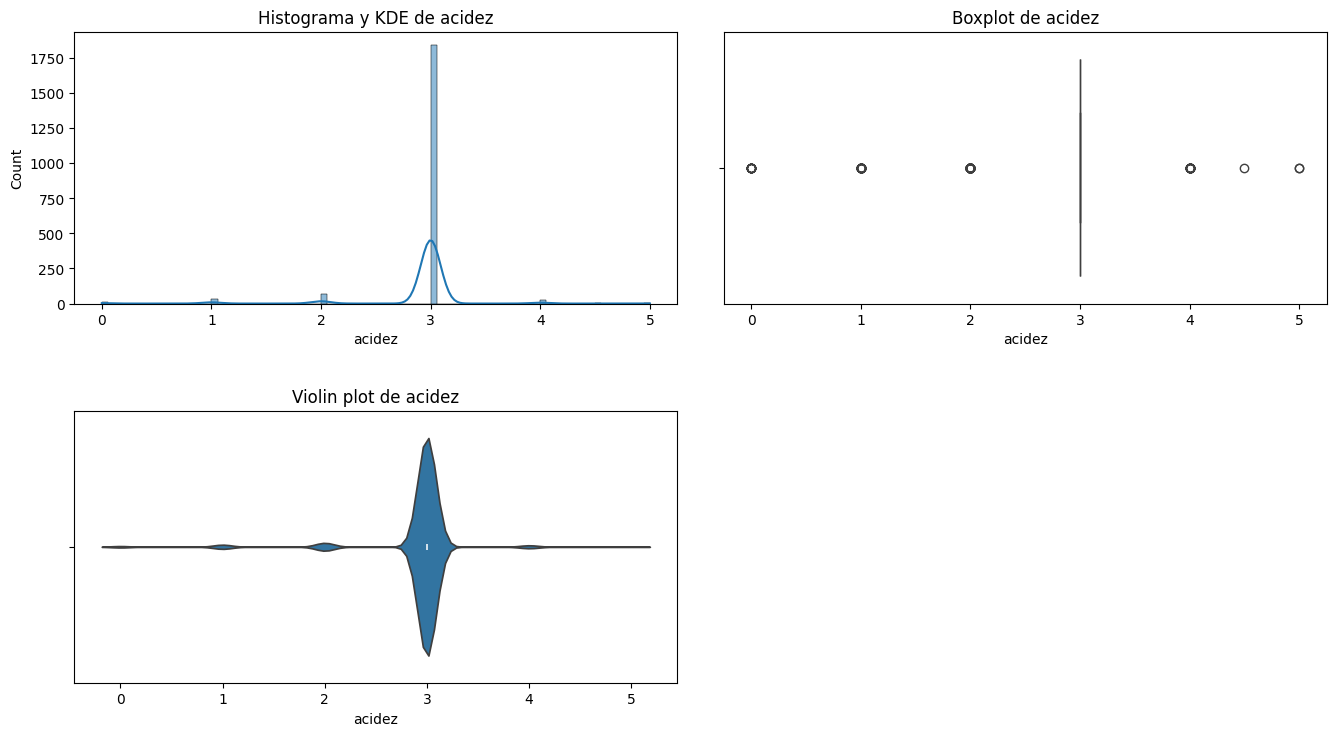

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(0.0),
 'max': np.float64(5.0),
 'mean': np.float64(2.93),
 'median': np.float64(3.0),
 'std': np.float64(0.41),
 'percentil_25': np.float64(3.0),
 'percentil_75': np.float64(3.0),
 'outliers_count': 141,
 'outliers_unique_values': {2.0: 66,
  1.0: 35,
  4.0: 25,
  0.0: 12,
  5.0: 2,
  4.5: 1}}

In [102]:
sp_eda.exploracion_num(df,'acidez')

In [103]:
df[df["acidez"] == 0]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
317,Finca Moncloa,Tintilla de Rota,2017,4.6,37,Espana,Cadiz,43.10,V.T. Cádiz,0.0,0.0
623,Cerro San Cristobal,Dominio del Verso Red Blend,2018,4.5,27,Espana,Condado de Huelva,29.50,Tinto,0.0,0.0
723,Bodegas Tradicion,Cream Tradicion Vos 20 Years,N.V.,4.4,527,Espana,Jerez Cream,57.90,Jerez,0.0,0.0
1308,Bodega Tesalia,Arcos de la Frontera,2017,4.3,284,Espana,Andalucia,25.90,Tinto,0.0,0.0
1396,Pepe Mendoza Casa Agricola,Giro de Abargues,2019,4.3,167,Espana,Alicante,23.50,Tinto,0.0,0.0
1405,Agusti Torello Mata,Cava Kripta Gran Reserva Brut Nature,2006,4.3,155,Espana,Cava,87.39,Cava,0.0,0.0
1411,Recaredo,Serral del Vell Brut Nature,2013,4.3,149,Espana,Cava,44.41,Cava,0.0,0.0
1524,Terra Remota,Clos Adrien,2013,4.3,82,Espana,Emporda,47.00,Tinto,0.0,0.0
1526,Llopart,Cava Original Brut (Espumos),2008,4.3,81,Espana,Cava,62.90,Cava,0.0,0.0
1532,Dominio de la Vega,Finca la Beata Bobal,2014,4.3,80,Espana,Utiel-Requena,33.90,Tinto,0.0,0.0


La columna 'cuerpo' es de tipo float64.
El número total de valores únicos es de 6.
Los valores únicos son: [5.  4.  3.  2.  3.5 0. ]
--------------------------------------------------------------------------

📊 Exploración numérica de 'cuerpo':
 - min: 0.0
 - max: 5.0
 - mean: 4.11
 - median: 4.0
 - std: 0.79
 - percentil_25: 4.0
 - percentil_75: 5.0
--------------------------------------------------------------------------

Tabla completa describe():
count    1987.000000
mean        4.113991
std         0.789193
min         0.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: cuerpo, dtype: float64
--------------------------------------------------------------------------

🔍 Número de outliers detectados: 51
Conteo de outliers por valor único:
cuerpo
2.0    39
0.0    12
Name: count, dtype: int64
--------------------------------------------------------------------------


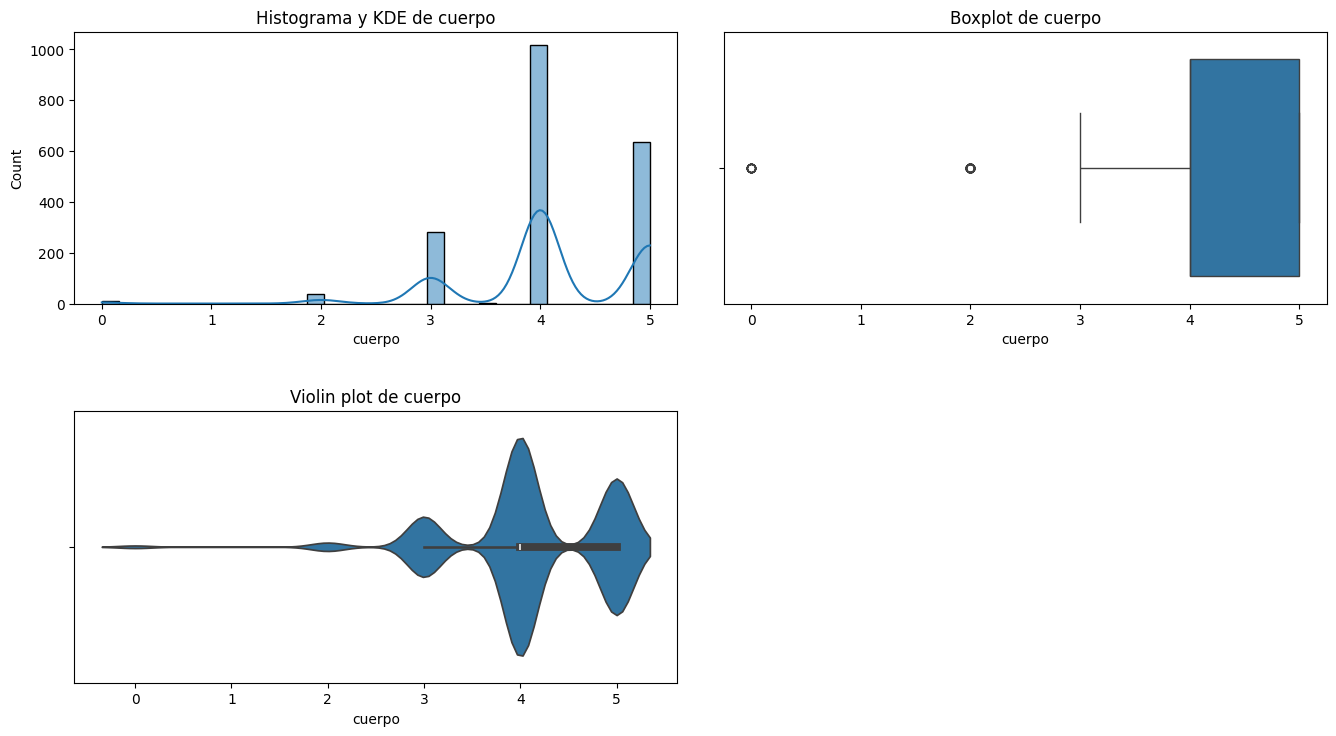

--------------------------------------------------------------------------
return - stats dict:


{'min': np.float64(0.0),
 'max': np.float64(5.0),
 'mean': np.float64(4.11),
 'median': np.float64(4.0),
 'std': np.float64(0.79),
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(5.0),
 'outliers_count': 51,
 'outliers_unique_values': {2.0: 39, 0.0: 12}}

In [104]:
sp_eda.exploracion_num(df,'cuerpo')

In [105]:
df[df["cuerpo"] == 0]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
317,Finca Moncloa,Tintilla de Rota,2017,4.6,37,Espana,Cadiz,43.10,V.T. Cádiz,0.0,0.0
623,Cerro San Cristobal,Dominio del Verso Red Blend,2018,4.5,27,Espana,Condado de Huelva,29.50,Tinto,0.0,0.0
723,Bodegas Tradicion,Cream Tradicion Vos 20 Years,N.V.,4.4,527,Espana,Jerez Cream,57.90,Jerez,0.0,0.0
1308,Bodega Tesalia,Arcos de la Frontera,2017,4.3,284,Espana,Andalucia,25.90,Tinto,0.0,0.0
1396,Pepe Mendoza Casa Agricola,Giro de Abargues,2019,4.3,167,Espana,Alicante,23.50,Tinto,0.0,0.0
1405,Agusti Torello Mata,Cava Kripta Gran Reserva Brut Nature,2006,4.3,155,Espana,Cava,87.39,Cava,0.0,0.0
1411,Recaredo,Serral del Vell Brut Nature,2013,4.3,149,Espana,Cava,44.41,Cava,0.0,0.0
1524,Terra Remota,Clos Adrien,2013,4.3,82,Espana,Emporda,47.00,Tinto,0.0,0.0
1526,Llopart,Cava Original Brut (Espumos),2008,4.3,81,Espana,Cava,62.90,Cava,0.0,0.0
1532,Dominio de la Vega,Finca la Beata Bobal,2014,4.3,80,Espana,Utiel-Requena,33.90,Tinto,0.0,0.0


In [106]:
df['anio'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '200920112012', '2006', '2000',
       '2003', '2002', '1991', '1994', '1990', '1989', '1987', '1986',
       '1981', '2001', '1968', '1964', '1982', '1974', '1983', '1955',
       '1980', '1972', '1953', '1958', '1942', '1965', '1992', '1973',
       '1997', '1967', '1975', '1910', '1961', '1954', '1988', '1969',
       '1951', '1928', '1976', '1949', '2021', '1959', '1922', '1978',
       '1925'], dtype=object)

En el contexto de vinos, "N.V." significa "Non-Vintage" o "Sin añada".

Esto quiere decir que el vino no se ha etiquetado con un año específico de cosecha. Es común en vinos espumosos (como algunos champagnes o cavas) o en vinos que son mezclas de varias añadas para mantener un perfil de sabor consistente.

In [107]:
df[df["anio"] == 'N.V.']

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Espana,Jerez-Xeres-Sherry,253.00,Jerez,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,N.V.,4.7,58,Espana,Jerez Palo Cortado,380.00,Jerez,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,N.V.,4.7,42,Espana,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,N.V.,4.7,41,Espana,Manzanilla,95.57,Jerez,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,N.V.,4.6,74,Espana,Jerez-Xeres-Sherry,189.99,Jerez,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1860,Gonzalez-Byass,Del Duque Amontillado Sherry VORS,N.V.,4.2,1016,Espana,Jerez Amontillado,77.22,Jerez,4.0,3.0
1905,Williams & Humbert,Dos Cortados Palo Cortado Solera Especial Aged 20 Years,N.V.,4.2,666,Espana,Jerez Palo Cortado,32.16,Jerez,4.0,3.0
1934,Fernando de Castilla,Antique Palo Cortado,N.V.,4.2,519,Espana,Jerez Palo Cortado,36.90,Jerez,4.0,3.0
1942,Williams & Humbert,Jalifa Amontillado Rare Old Dry Solera Especial Aged 30 Years,N.V.,4.2,487,Espana,Jerez Amontillado,33.50,Jerez,4.0,3.0


In [108]:
correcciones = {
    317: {"cuerpo": 4.0, "acidez": 3.0},
    623: {"cuerpo": 3.5, "acidez": 3.0},
    723: {"cuerpo": 5.0, "acidez": 2.0},
    1308: {"cuerpo": 4.0, "acidez": 3.0},
    1396: {"cuerpo": 3.5, "acidez": 3.5},
    1405: {"cuerpo": 3.5, "acidez": 4.5},
    1411: {"cuerpo": 3.0, "acidez": 4.5},
    1524: {"cuerpo": 3.5, "acidez": 3.5},
    1526: {"cuerpo": 3.0, "acidez": 4.0},
    1532: {"cuerpo": 4.0, "acidez": 3.5},
    1534: {"cuerpo": 3.0, "acidez": 4.0},
    1535: {"cuerpo": 4.5, "acidez": 3.5}}

for idx, valores in correcciones.items():
    for col, val in valores.items():
        df.loc[idx, col] = val

# verificacion
df.loc[list(correcciones.keys()), ["vino", "cuerpo", "acidez"]]

,vino,cuerpo,acidez
317,Tintilla de Rota,4.0,3.0
623,Dominio del Verso Red Blend,3.5,3.0
723,Cream Tradicion Vos 20 Years,5.0,2.0
1308,Arcos de la Frontera,4.0,3.0
1396,Giro de Abargues,3.5,3.5
1405,Cava Kripta Gran Reserva Brut Nature,3.5,4.5
1411,Serral del Vell Brut Nature,3.0,4.5
1524,Clos Adrien,3.5,3.5
1526,Cava Original Brut (Espumos),3.0,4.0
1532,Finca la Beata Bobal,4.0,3.5


In [109]:
df[df["cuerpo"] == 0]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


In [110]:
df[df["acidez"] == 0]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


In [111]:
df.drop(columns='pais', inplace=True)

In [112]:
df.head(2)

,bodega,vino,anio,calificacion,num_resenas,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Rioja Alavesa,313.5,Tempranillo,4.0,2.0


In [113]:
# Creamos una columna 'ID' con un número secuencial para cada fila
df['id_vino'] = range(1, len(df) + 1)
print(df.head(5))

          bodega           vino  anio  calificacion  num_resenas  \
0  Teso La Monja          Tinto  2013           4.9           58   
1         Artadi  Vina El Pison  2018           4.9           31   
2   Vega Sicilia          Unico  2009           4.8         1793   
3   Vega Sicilia          Unico  1999           4.8         1705   
4   Vega Sicilia          Unico  1996           4.8         1309   

             region  precio                    tipo  cuerpo  acidez  id_vino  
0              Toro  995.00              Toro Tinto     5.0     3.0        1  
1     Rioja Alavesa  313.50             Tempranillo     4.0     2.0        2  
2  Ribera del Duero  324.95  Ribera del Duero Tinto     5.0     3.0        3  
3  Ribera del Duero  692.96  Ribera del Duero Tinto     5.0     3.0        4  
4  Ribera del Duero  778.06  Ribera del Duero Tinto     5.0     3.0        5  


In [114]:
df.to_csv('files/vinos_final.csv', index=False)

In [115]:
df["region"].unique()

array(['Toro', 'Rioja Alavesa', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Costers del Segre', 'Sardon de Duero', 'Malaga', 'Cataluna',
       'Rueda', 'Jerez Pedro Ximenes (PX)', 'Montsant',
       'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado', 'Navarra',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Alella', 'Pla i Llevant',
       'Pla de Bages', 'Pago Calzadilla', 'Andalucia', 'Monterrei',
       'Ribera del Gallego-Cinco Villas', 'Aragon', 'L

In [116]:
df["region"].unique()

array(['Toro', 'Rioja Alavesa', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Costers del Segre', 'Sardon de Duero', 'Malaga', 'Cataluna',
       'Rueda', 'Jerez Pedro Ximenes (PX)', 'Montsant',
       'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado', 'Navarra',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Alella', 'Pla i Llevant',
       'Pla de Bages', 'Pago Calzadilla', 'Andalucia', 'Monterrei',
       'Ribera del Gallego-Cinco Villas', 'Aragon', 'L

In [117]:
df[df['region'] == 'Granada']

,bodega,vino,anio,calificacion,num_resenas,region,precio,tipo,cuerpo,acidez,id_vino


In [118]:
df["anio"].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '200920112012', '2006', '2000',
       '2003', '2002', '1991', '1994', '1990', '1989', '1987', '1986',
       '1981', '2001', '1968', '1964', '1982', '1974', '1983', '1955',
       '1980', '1972', '1953', '1958', '1942', '1965', '1992', '1973',
       '1997', '1967', '1975', '1910', '1961', '1954', '1988', '1969',
       '1951', '1928', '1976', '1949', '2021', '1959', '1922', '1978',
       '1925'], dtype=object)